In [71]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import KernelPCA, PCA

from factor_analyzer import FactorAnalyzer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn import preprocessing  
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [72]:
df = pd.read_excel('inliner.xlsx')
X_input = df.dropna()
scaler = MinMaxScaler()
X_input = scaler.fit_transform(X_input)
X_input = pd.DataFrame(X_input)
X_input.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","label","Scaled sound pressure level"] #添加自定义的columns的名字


In [73]:
X_input

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,label,Scaled sound pressure level
0,0.037975,0.000000,1.000000,1.000000,0.039005,0.0,0.598828
1,0.050633,0.000000,1.000000,1.000000,0.039005,0.0,0.571696
2,0.066456,0.000000,1.000000,1.000000,0.039005,0.0,0.592045
3,0.088608,0.000000,1.000000,1.000000,0.039005,0.0,0.636541
4,0.113924,0.000000,1.000000,1.000000,0.039005,0.0,0.633014
...,...,...,...,...,...,...,...
1392,0.113924,0.702703,0.272727,0.199495,0.904111,1.0,0.183520
1393,0.145570,0.702703,0.272727,0.199495,0.904111,1.0,0.166427
1394,0.186709,0.702703,0.272727,0.199495,0.904111,1.0,0.139024
1395,0.240506,0.702703,0.272727,0.199495,0.904111,1.0,0.067124


In [74]:
X = X_input.iloc[:,0:6]

y = X_input.iloc[:,6]

In [75]:
X

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,label
0,0.037975,0.000000,1.000000,1.000000,0.039005,0.0
1,0.050633,0.000000,1.000000,1.000000,0.039005,0.0
2,0.066456,0.000000,1.000000,1.000000,0.039005,0.0
3,0.088608,0.000000,1.000000,1.000000,0.039005,0.0
4,0.113924,0.000000,1.000000,1.000000,0.039005,0.0
...,...,...,...,...,...,...
1392,0.113924,0.702703,0.272727,0.199495,0.904111,1.0
1393,0.145570,0.702703,0.272727,0.199495,0.904111,1.0
1394,0.186709,0.702703,0.272727,0.199495,0.904111,1.0
1395,0.240506,0.702703,0.272727,0.199495,0.904111,1.0


In [76]:
y

0       0.598828
1       0.571696
2       0.592045
3       0.636541
4       0.633014
          ...   
1392    0.183520
1393    0.166427
1394    0.139024
1395    0.067124
1396    0.056814
Name: Scaled sound pressure level, Length: 1397, dtype: float64

In [77]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = sm.add_constant(X) 
model = sm.OLS(y, x).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.457
Model:                                     OLS   Adj. R-squared:                  0.455
Method:                          Least Squares   F-statistic:                     195.2
Date:                         Sun, 07 May 2023   Prob (F-statistic):          1.86e-180
Time:                                 15:35:38   Log-Likelihood:                 881.07
No. Observations:                         1397   AIC:                            -1748.
Df Residuals:                             1390   BIC:                            -1711.
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10) #

In [80]:
mean_squared_error(y_test,model.predict(x_test))

0.014555788978274715

In [81]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [82]:

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) #
ridge=Ridge(alpha=0.4)
ridge.fit(X_train,y_train)
print("Training dataset score："+str(r2_score(y_train,ridge.predict(X_train))))
print("Testing dataset score："+str(r2_score(y_test,ridge.predict(x_test))))
print("Training dataset MSE："+str(mean_squared_error(y_train,ridge.predict(X_train))))
print("Testing dataset MSE："+str(mean_squared_error(y_test,ridge.predict(x_test))))

Training dataset score：0.44750342212887173
Testing dataset score：0.47206691427817926
Training dataset MSE：0.01742790011246197
Testing dataset MSE：0.014734471176263846


In [83]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform Lasso regression with cross-validation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

# evaluate the model on the test set
train_score=lasso_cv.score(X_train, y_train)
test_score = lasso_cv.score(X_test, y_test)
print("Training dataset score："+str(train_score))
print("Testing dataset score："+str(test_score))
print("Training dataset MSE："+str(mean_squared_error(y_train,lasso_cv.predict(X_train))))
print("Testing dataset MSE："+str(mean_squared_error(y_test,lasso_cv.predict(X_test))))

Training dataset score：0.4792723813803049
Testing dataset score：0.35204028962972145
Training dataset MSE：0.016252776347968224
Testing dataset MSE：0.018103558944845995


In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [85]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 
from sklearn.preprocessing import MinMaxScaler
# Training dataset MinMaxSscaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
y_train=y_train.values.reshape(-1,1)
min_max_scaler.fit(y_train)
y_train = min_max_scaler.transform(y_train)
# Testing dataset MinMaxSscaler
min_max_scaler.fit(x_test)
x_test = min_max_scaler.transform(x_test)
y_test=y_test.values.reshape(-1,1)
min_max_scaler.fit(y_test)
y_test = min_max_scaler.transform(y_test)

In [86]:
#Decision Tree
DTR = DecisionTreeRegressor(max_depth=30)
DTR.fit(X_train,y_train)
y_pre_DTR = DTR.predict(x_test)
DTR_score=r2_score(y_test,y_pre_DTR)
print(DTR_score)
print(mean_squared_error(y_test,y_pre_DTR))

0.6836981980535292
0.009238830438199655


In [87]:
#SVR
SUPPOT = SVR()
SUPPOT.fit(X_train,y_train)
y_pre_SVR = SUPPOT.predict(x_test)
SVR_score=r2_score(y_test,y_pre_SVR)
print(SVR_score)
print(mean_squared_error(y_test,y_pre_SVR))

0.6504674090480502
0.010209465518556126


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
#Randomforest
rf = RandomForestRegressor(n_estimators=30,max_depth=20)
rf.fit(X_train,y_train)
y_pre_rf = rf.predict(x_test)
rf_score=r2_score(y_test,y_pre_rf)
print(rf_score)
print(mean_squared_error(y_test,y_pre_rf))

0.8076800772872343
0.005617455053675611


C:\Users\jingu\AppData\Local\Temp/ipykernel_7148/2182861441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [89]:
#AdaBoostRegression
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pre_adb = adb.predict(x_test)
adb_score=r2_score(y_test,y_pre_adb)
print(adb_score)
print(mean_squared_error(y_test,y_pre_adb))

0.5590945690866302
0.012878366453882371


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
#GradientBoostingRegression
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)
y_pre_gbtr = gbtr.predict(x_test)
gbtr_score=r2_score(y_test,y_pre_gbtr)
print(gbtr_score)
print(mean_squared_error(y_test,y_pre_gbtr))

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7514772060628458
0.007259079585014734


In [91]:
from sklearn.neural_network import MLPRegressor

In [92]:
train_score = []
test_score = []
layers = list(range(5,300,5)) 
for i in layers:
    MLP = MLPRegressor(activation = 'relu', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
    MLP.fit(X_train,y_train)
    y_pre=MLP.predict(x_test)
    test_score.append(mean_squared_error(y_test,y_pre))

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y 

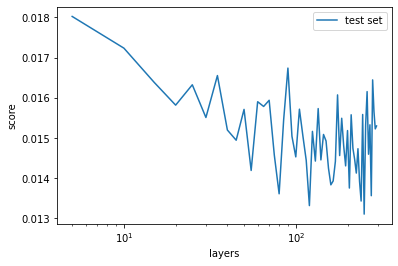

In [93]:
# Plot scores
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")

In [94]:
min(test_score)

0.0131053337624628